# Project 3 - Movie Prediction

Name: Klajdi Bodurri (74264)

### Motivation and Goal

We want to built a model to predict the success or the failure of movie which is about to be released. We have to select the features that are more suitable for our goal, to retrieve the movies data using OMDB API and finally train the models using movies that are released from 2006 to 2016 and test the models using movies that are released in 2017.

### Approach

**Steps**:
    1. Read the dataset.
    2. Drop N/A values.
    3. Normalize runtime feature.
    4. Encode nominal features.
    5. Descriptive analysis of the dataset to get a basic idea of what the dataset is about     
    6. Separate the dataset to train set (2006-2016 movies) and test test (2017 movies).
    7. Train the models.
    8. Measure the accuracy.
    9. Show which model has the best accuracy and why 
    
**For the implementation of the project we are going use modules such as**:
    
    1. matplotlib and sns (for descriptive analysis)
    2. pandas (to handle the dataset)
    3. sklearn (to build our models)

**The models are**:

    1. Linear Regression
    2. Logistic Regression
    3. Naive Bayes
    4. Support Vector Machines

### Import modules and libraries

In [28]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import svm

from sklearn import preprocessing

from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from matplotlib.pyplot import subplots

### Preparation of the dataset


In [29]:
# read the dataset
dataset = pd.read_csv("movies.csv")

# for printing purposes
df = dataset

# drop movie id
dataset = dataset.drop(['id'], axis=1)

# drop N/A values
dataset = dataset.dropna(axis=0, how='any')

# normalize the runtime!!!
runtime = dataset[['runtime']].values.astype(float)
dataset = dataset.drop(['runtime'], axis=1)
runtime_scaled = preprocessing.scale(runtime)
runtime_scaled = pd.DataFrame(runtime_scaled, columns=['runtime'])
dataset = pd.concat([dataset, runtime_scaled], axis=1, ignore_index=False)

# drop N/A values again because of runtime N/A values after the normalization
dataset = dataset.dropna(axis=0, how='any')

# separate the dataset to features and target variable
X = dataset.loc[:, dataset.columns != 'Success_of_Movie']
y = dataset[['Success_of_Movie']]

# separate nominals and numeric features
X_numeric = X[['runtime','released']]
X_nominal = X.drop(['runtime', 'released'], axis=1)
X_onehoted = pd.get_dummies(X_nominal)

X = pd.concat([X_onehoted, X_numeric], axis=1, ignore_index=False)

y = pd.get_dummies(y)
y = pd.concat([y, dataset['released']], axis=1, ignore_index=False)

# split to train and test set
X_train = X.loc[X['released'] != 2017.0].drop(['released'], axis = 1)
y_train = y.loc[y['released'] != 2017.0].drop(['released'], axis = 1)['Success_of_Movie_Success']

X_test = X.loc[X['released'] == 2017.0].drop(['released'], axis = 1)
y_test = y.loc[y['released'] == 2017.0].drop(['released'], axis = 1)['Success_of_Movie_Success']

df.head()

,Success_of_Movie,actor1,actor2,country,director,genre,id,language,released,runtime,writer
0,Success,Rubens Correia,Ivan de Albuquerque,Brazil,Walter Lima Jr.,Drama,tt0066853,Portuguese,2016.0,68.0,Walter Lima Jr.
1,Success,Allen Garfield,Zack Norman,USA,Neil Cohen,Comedy,tt0094859,English,2016.0,74.0,Neil Cohen
2,Success,Tetta Sugimoto,Tomoko Yamaguchi,Japan,Junji Sakamoto,Comedy,tt0115686,Japanese,2008.0,100.0,Junji Sakamoto
3,Success,Ian Hart,Claudia Wells,USA,Halfdan Hussey,Drama,tt0117743,English,2008.0,83.0,Halfdan Hussey
4,Failure,Ally Sheedy,Brian O'Halloran,USA,Keith Spiegel,Comedy,tt0119231,English,2007.0,82.0,Keith Spiegel


From the above output we can see our features. The Success_of_Movie column is the target variable. The value Success means that the movie has IMDB rating > 5 and the Failure means that the movie's rating is below 5. I didn't include features as the 'box office' because is something that you know after the movie is released. So, for example if we want to do the prediction for a movie that it will be released on 2019, we don't know the box office, but we know the actors, country, genre, writer etc... And this is useful because a production company can use this model to predict if a movie will be successful based on the movie cast. 

In [30]:
print("Dimensions of train set: {}".format(X_train.shape))
print("Dimensions of test set: {}".format(X_test.shape))

Dimensions of train set: (781, 3407)
Dimensions of test set: (95, 3407)


We will use 781 samples to train our models and 95 samples to measure the accuracy.

### Descriptive analysis

Since we have a lot of nominal features, its more useful to plot some histograms. But, our nominal features can have a lot of different values so the histograms will be huge. I am going to plot a histogram only for the Genre feature just to get the basic idea.

[]

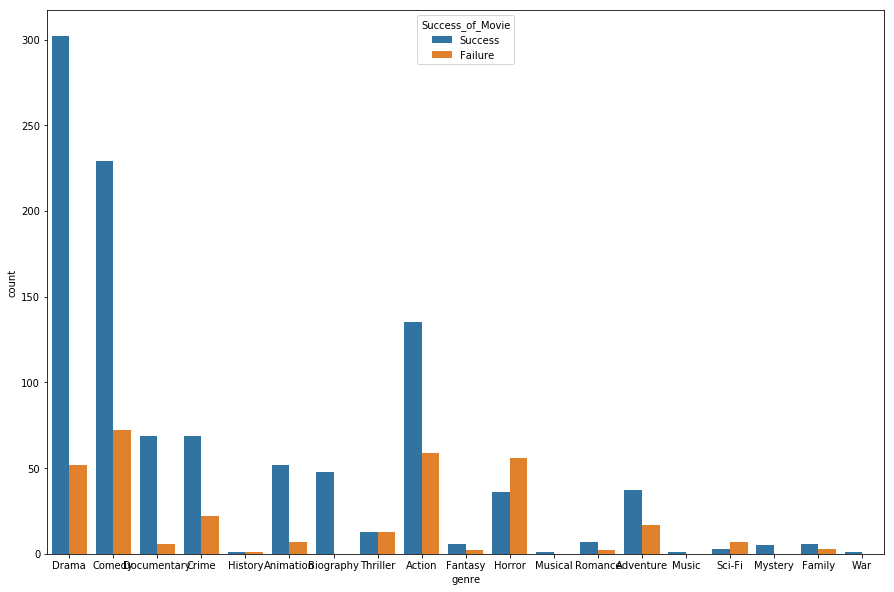

In [34]:
fig, ax = subplots(figsize=(15,10))
sns.countplot(x="genre", hue='Success_of_Movie' , data=df, ax=ax)
plt.plot()

By this plot we can understand that the drama movies are more likely to be successful. By changing the x in sns.countplot we can see the histogram for others features as well. I didn't include them because then the report would be huge.

[]

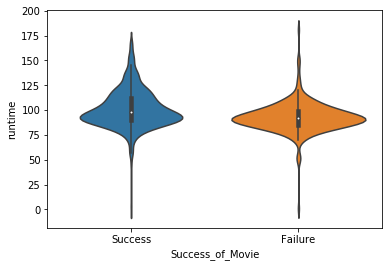

In [40]:
sns.violinplot(x = "Success_of_Movie", y="runtime", data = df)
plt.plot()

The only non nominal feature we have is the runtime and by this plot we can see that its more likely for a movie to be failure if its runtime is between 75-100 minutes.

### Time to build our models

Since we seperated the dataset to train and test set, the next step is to build our models and measure the accuracy to see which model is better for our dataset.

In [3]:
# models list
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Regression', LinearRegression()))
models.append(('Naive Bayes', BernoulliNB()))
models.append(('SVM', svm.SVC()))
results = []
names = []

# measure the accuracy of each model
for name, model in models:
    clf = model.fit(X_train, y_train) 
    print("{}: {:.2}".format(name, clf.score(X_test, y_test)))

Logistic Regression: 0.79
Linear Regression: 0.092
Naive Bayes: 0.79
SVM: 0.79


We can say that the linear regression is the worst model to use since its accuracy is very low. But, the other 3 methods have a good accuracy. So, which one is the 'best' ? Well, it really depends on the data that you are using to train your model.

About the perfomance, the SVM takes the most time, since the number of features is much greater than the number of samples after the encoding of the nominal features.

On the other hand, Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

Lastly, the Linear Regression is a method mostly used for regression problems, not classification, thats why it has so low accuracy.